In [31]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cv2 as cv
from PIL import Image, ImageDraw, ImageFilter
from tensorflow.keras.models import load_model 
from scipy import ndimage
from imutils.object_detection import non_max_suppression 
import random

In [2]:
with open('eval.json') as json_file:
    data = json.load(json_file)

In [3]:
categories_data = pd.DataFrame(data['categories'])
display(categories_data.style.background_gradient(cmap='Blues', axis=0))

,id,name
0,1,Регистрация (постановка на учет)
1,2,Снятие с учета


In [4]:
images_data = pd.DataFrame(data['images'])
images_data = images_data.rename(columns={'id': 'image_id'})
display(images_data.iloc [np.r_[0:7, (len(images_data)-7):len(images_data),:]].style.background_gradient(cmap='Blues', axis=0))

,width,height,image_id,file_name
0,2481,3507,0,85942.jpg
1,2456,3483,1,83393.jpg
2,1973,3508,2,83367.jpg
3,2631,3508,3,83283.jpg
4,2456,3483,4,83281.jpg
5,2631,3508,5,83277.jpg
6,1163,1600,6,83275.jpg
653,2631,3508,653,85980.jpg
654,2631,3508,654,85976.jpg
655,2631,3508,655,85972.jpg


In [5]:
images_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   width      660 non-null    int64 
 1   height     660 non-null    int64 
 2   image_id   660 non-null    int64 
 3   file_name  660 non-null    object
dtypes: int64(3), object(1)
memory usage: 20.8+ KB


In [6]:
k = 0
for i in range(0, len(images_data)):
    try:
        f = images_data.loc[images_data['image_id'] == i, 'file_name'].iloc[0]
        img = cv2.imdecode(np.fromfile('images/'+ f, dtype=np.uint8), 1)
    except FileNotFoundError:
        print('\u001b[38;5;19m', f'Не найден файл в папке images: {f} image_id = {i}', '\u001b[0m')
        k += 1
        images_data = images_data.loc[images_data['image_id'] != i]

 Не найден файл в папке images: 85942.jpg image_id = 0 
 Не найден файл в папке images: 83367.jpg image_id = 2 
 Не найден файл в папке images: 83283.jpg image_id = 3 
 Не найден файл в папке images: 83277.jpg image_id = 5 
 Не найден файл в папке images: 83269.jpg image_id = 7 
 Не найден файл в папке images: 83263.jpg image_id = 8 
 Не найден файл в папке images: 83250.jpg image_id = 13 
 Не найден файл в папке images: 83246.jpg image_id = 14 
 Не найден файл в папке images: 83240.jpg image_id = 16 
 Не найден файл в папке images: 83234.jpg image_id = 18 
 Не найден файл в папке images: 83344.jpg image_id = 21 
 Не найден файл в папке images: 83341.jpg image_id = 22 
 Не найден файл в папке images: 83335.jpg image_id = 24 
 Не найден файл в папке images: 83333.jpg image_id = 25 
 Не найден файл в папке images: 83321.jpg image_id = 29 
 Не найден файл в папке images: 83319.jpg image_id = 30 
 Не найден файл в папке images: 83316.jpg image_id = 31 
 Не найден файл в папке images: 83313

In [7]:
print('\u001b[38;5;19m', f'Удалили из списка отсутствующие файлы\n Количество отсутствующих файлов изображения: {k}', '\u001b[0m')

 Удалили из списка отсутствующие файлы
 Количество отсутствующих файлов изображения: 351 


In [8]:
images_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 1 to 657
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   width      309 non-null    int64 
 1   height     309 non-null    int64 
 2   image_id   309 non-null    int64 
 3   file_name  309 non-null    object
dtypes: int64(3), object(1)
memory usage: 12.1+ KB


In [9]:
list_image_id = images_data['image_id'].tolist()

In [10]:
emnist_labels = [i for i in range(1,5)]
model = load_model('model_registration_recognition.keras')

In [11]:
for i in list_image_id:
    f = images_data.loc[images_data['image_id'] == i, 'file_name'].iloc[0]
    img = cv2.imdecode(np.fromfile('images/'+ f, dtype=np.uint8), 1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = Image.fromarray(gray, mode=None) 
    fixed_len = 512
    draw = ImageDraw.Draw(img) 
    width, height = img.size
    width = img.size[0] 
    height = img.size[1] 
    if width >= height:
        ratio = (fixed_len+1)/float(img.size[0])
        new_height = int(ratio * img.size[1])
        new_size = (fixed_len+1, new_height)
    else:
        ratio = (fixed_len+1)/float(img.size[1])
        new_width = int(ratio * img.size[0])
        new_size = (new_width, fixed_len+1)
    img = img.resize(new_size)
    
    sharp_img = img.filter(ImageFilter.SHARPEN)
    img = sharp_img.resize((fixed_len, fixed_len))
    img = np.asarray(img)
    img = np.array(img)/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    result = np.argmax(predict, axis=1)
    num = emnist_labels[result[0]]

    if num == 1:
        images_data.loc[images_data['image_id'] == i, 'rotate'] = -90
    elif num == 2:
        images_data.loc[images_data['image_id'] == i, 'rotate'] = 0
    elif num == 3:
        images_data.loc[images_data['image_id'] == i, 'rotate'] = 90
    elif num == 4:
        images_data.loc[images_data['image_id'] == i, 'rotate'] = 180

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

In [12]:
images_data['rotate'] = images_data['rotate'].astype(int)
display(images_data.iloc [np.r_[0:7, (len(images_data)-7):len(images_data),:]].style.background_gradient(cmap='Blues', axis=0))

,width,height,image_id,file_name,rotate
1,2456,3483,1,83393.jpg,90
4,2456,3483,4,83281.jpg,-90
6,1163,1600,6,83275.jpg,0
9,2456,3483,9,83259.jpg,0
10,1024,768,10,83257.jpg,0
11,1654,2338,11,83255.jpg,0
12,828,645,12,83252.jpg,0
645,3507,2481,645,86025.jpg,90
646,1700,2338,646,86022.jpg,0
651,960,1280,651,85985.jpg,90


In [32]:
num = random.randrange(0, len(list_image_id))
i = list_image_id[num]
print(i)

440


0


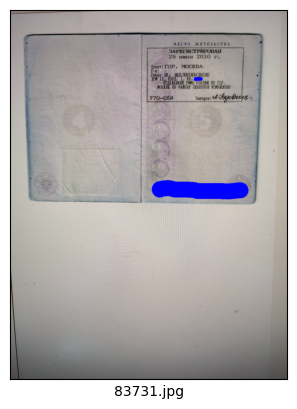

In [33]:
f = images_data.loc[images_data['image_id'] == i, 'file_name'].iloc[0]
img = cv2.imdecode(np.fromfile('images/'+ f, dtype=np.uint8), 1)

angle = images_data.loc[images_data['image_id'] == i, 'rotate'].iloc[0]
print(angle)
if angle == 90:
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
elif angle == 180:
    img = cv2.rotate(img, cv2.ROTATE_180)
elif angle == -90:
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img, cmap='gray')
plt.xlabel(f)
None

(40, 462)


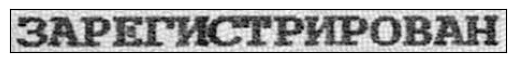

(120, 462)


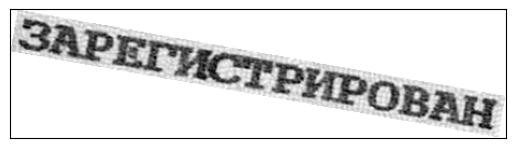

(80, 464)


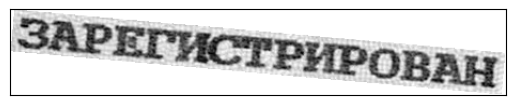

(80, 464)


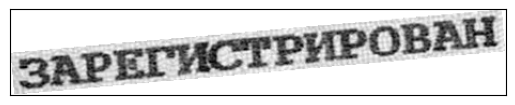

(120, 462)


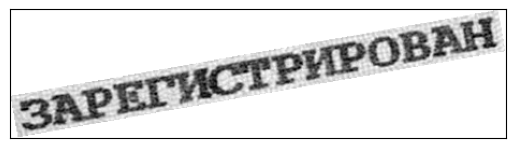

In [13]:
sample_list_1 = []
num = 1
k = 0
img_path = 'sample_img/example_'+str(num)+'.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
sample_list_1.append(img)
lst = [0, -10, -5, 5, 10]
for i in lst:
    img = sample_list_1[k]
    img = ndimage.rotate(img, i, cval=255, reshape=True)
    sample_list_1.append(img)
    plt.imshow(img, cmap='gray')
    print(img.shape)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

In [14]:
n = len(sample_list_1)
pr = [0.7, 0.5, 0.3]
for pr in pr:
    for i in range(0, n):
        img = cv2.resize(sample_list_1[i], (int(sample_list_1[i].shape[0]*pr), int(sample_list_1[i].shape[1]*pr)), interpolation=cv2.INTER_NEAREST)
        sample_list_1.append(img)

In [15]:
print(len(sample_list_1))

24


(92, 1068)


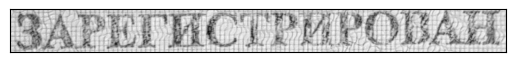

(276, 1068)


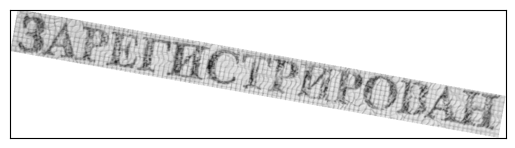

(185, 1072)


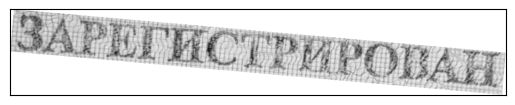

(185, 1072)


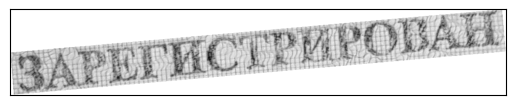

(276, 1068)


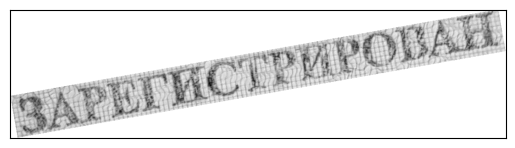

In [16]:
sample_list_2 = []
num = 2
k = 0
img_path = 'sample_img/example_'+str(num)+'.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
sample_list_2.append(img)
lst = [0, -10, -5, 5, 10]
for i in lst:
    img = sample_list_2[k]
    img = ndimage.rotate(img, i, cval=255, reshape=True)
    sample_list_2.append(img)
    plt.imshow(img, cmap='gray')
    print(img.shape)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

In [17]:
n = len(sample_list_2)
pr = [0.7, 0.5, 0.3]
for pr in pr:
    for i in range(0, n):
        img = cv2.resize(sample_list_2[i], (int(sample_list_2[i].shape[0]*pr), int(sample_list_2[i].shape[1]*pr)), interpolation=cv2.INTER_NEAREST)
        sample_list_2.append(img)

In [18]:
print(len(sample_list_2))

24


In [28]:
i = 1
ms = 0
mx = 0
my = 0
mW = 0
mH = 0
f = images_data.loc[images_data['image_id'] == i, 'file_name'].iloc[0]
img = cv2.imdecode(np.fromfile('images/'+ f, dtype=np.uint8), 1)
angle = images_data.loc[images_data['image_id'] == i, 'rotate'].iloc[0]
if angle == -90:
    img = ndimage.rotate(img, 90, cval=255, reshape=True)
elif angle == 0:
    img = img
elif angle == 90:
    img = ndimage.rotate(img, -90, cval=255, reshape=True)
elif angle == 180:
    img = ndimage.rotate(img, 180, cval=255, reshape=True)
gtray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
ms_data = pd.DataFrame()
boxes = list() 
 
for i in range(1,3):
    if i == 1:
        temp=sample_list_1
    elif i == 2:
        temp=sample_list_2
    #else:
        #temp=temp_3
 
    for k in temp:
 
        W, H = k.shape[:2] 
        thresh = 0.4
 
        img_gray = gray
        temp_gray = k #cv2.cvtColor(k, cv2.COLOR_BGR2GRAY) 
        match = cv2.matchTemplate(image=img_gray, templ=temp_gray,  method=cv2.TM_CCOEFF_NORMED) 
        (y_points, x_points) = np.where(match >= thresh) 
 
        boxes = list() 
 
        for (x, y) in zip(x_points, y_points): 
 
            boxes.append((x, y, x + W, y + H)) 
 
        boxes = non_max_suppression(np.array(boxes)) 
  
    for (x1, y1, x2, y2) in boxes: 
        if x1 > mx:
            mx = x1
        if x1 > (mx - W/2):
            if x1 + y1 > ms:
                ms = x1 + y1
                mx = x1
                my = y1
                mW = W
                mH = H
    #ms_data.loc[len(ms_data.index)] = [ms, mx, my, mW, mH, i]
#max_ms = list(max_data.iloc[[max_data[0].idmax()]].T[0])